In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.insert(0, '../')
from scripts.tracking import MatchTracking 
from scripts.pass_events import PassEvents
from scripts.ball_visualization import BallVisualization

In [2]:
data_directory = r'..\data\tracking'
file = 'g2312201_SecondSpectrum_tracking-produced.jsonl'
match_tracking_path = os.path.join(data_directory, file)
match_tracking = MatchTracking(tracking_file_path=match_tracking_path)

In [42]:
df_ball = match_tracking.BallTracking.df_tracking

In [43]:
df_home = match_tracking.HomeTracking.df_tracking

In [44]:
df_home

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,jersey_number,speed,x,y
0,1,0,0.00,1674387294150,False,home,246319,14,0.00,16.93,16.79
0,1,0,0.00,1674387294150,False,home,192194,25,0.00,13.61,0.11
0,1,0,0.00,1674387294150,False,home,174349,9,0.00,3.04,17.82
0,1,0,0.00,1674387294150,False,home,96385,7,0.00,6.94,-8.83
0,1,0,0.00,1674387294150,False,home,459038,10,0.00,5.21,9.58
...,...,...,...,...,...,...,...,...,...,...,...
144074,2,144074,2882.04,1674394107470,False,away,165677,33,0.77,-9.20,14.65
144074,2,144074,2882.04,1674394107470,False,away,175128,13,0.18,2.95,2.06
144074,2,144074,2882.04,1674394107470,False,away,447080,2,1.08,-11.49,7.74
144074,2,144074,2882.04,1674394107470,False,away,96535,5,2.00,-8.57,21.25


In [45]:
df_ball = df_ball[(df_ball['z']>=0) & (df_ball['z']<=1)]
df_ball = df_ball[['period','gameClock','x','y']]
df_ball

,period,gameClock,x,y
0,1.0,0.00,-0.58,0.08
1,1.0,0.04,-0.89,0.09
2,1.0,0.08,-1.20,0.09
3,1.0,0.12,-1.52,0.10
4,1.0,0.16,-1.85,0.11
...,...,...,...,...
144060,2.0,2881.48,1.60,28.78
144061,2.0,2881.52,1.75,29.01
144062,2.0,2881.56,1.94,29.27
144063,2.0,2881.60,2.07,29.48


In [46]:
df_home = df_home.merge(df_ball,on=['period','gameClock'],suffixes=('','_ball'))

In [47]:
df_home['dist_ball'] = np.sqrt((df_home['x']-df_home['x_ball'])**2+(df_home['y']-df_home['y_ball'])**2)

In [48]:
df_home['touch'] = df_home['dist_ball']<=1

In [49]:
df_home

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,jersey_number,speed,x,y,x_ball,y_ball,dist_ball,touch
0,1,0,0.00,1674387294150,False,home,246319,14,0.00,16.93,16.79,-0.58,0.08,24.203805,False
1,1,0,0.00,1674387294150,False,home,192194,25,0.00,13.61,0.11,-0.58,0.08,14.190032,False
2,1,0,0.00,1674387294150,False,home,174349,9,0.00,3.04,17.82,-0.58,0.08,18.105579,False
3,1,0,0.00,1674387294150,False,home,96385,7,0.00,6.94,-8.83,-0.58,0.08,11.659267,False
4,1,0,0.00,1674387294150,False,home,459038,10,0.00,5.21,9.58,-0.58,0.08,11.125381,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871283,2,144064,2881.64,1674394107070,False,away,165677,33,0.88,-9.37,14.37,2.23,29.73,19.248106,False
871284,2,144064,2881.64,1674394107070,False,away,175128,13,0.35,2.94,2.14,2.23,29.73,27.599134,False
871285,2,144064,2881.64,1674394107070,False,away,447080,2,1.55,-10.98,7.74,2.23,29.73,25.652762,False
871286,2,144064,2881.64,1674394107070,False,away,96535,5,1.88,-8.53,20.46,2.23,29.73,14.202482,False


In [50]:
tmp = df_home.groupby(['period','frameIdx','touch']).sum().reset_index()

In [51]:
tmp = tmp[tmp['touch']==1] 

In [52]:
df_home = df_home.merge(tmp[['period','frameIdx']], on = ['period','frameIdx'], how = 'inner')

In [53]:
df_home[df_home['touch']]

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,jersey_number,speed,x,y,x_ball,y_ball,dist_ball,touch
4,1,586,23.44,1674387317590,True,home,459038,10,5.29,-12.46,26.26,-12.76,26.83,0.644127,True
15,1,591,23.64,1674387317790,True,home,459038,10,4.83,-11.99,27.18,-12.41,28.04,0.957079,True
26,1,592,23.68,1674387317830,True,home,459038,10,4.72,-11.91,27.35,-12.61,28.05,0.989949,True
35,1,616,24.64,1674387318790,True,home,174349,9,0.78,-17.23,30.77,-16.40,30.49,0.875957,True
46,1,617,24.68,1674387318830,True,home,174349,9,0.81,-17.24,30.80,-16.47,30.64,0.786448,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240029,2,142760,2829.48,1674394054910,False,away,96535,5,0.88,51.14,33.64,51.96,33.88,0.854400,True
240040,2,142761,2829.52,1674394054950,False,away,96535,5,0.91,51.10,33.64,51.96,33.88,0.892861,True
240051,2,142762,2829.56,1674394054990,False,away,96535,5,0.88,51.06,33.63,51.96,33.88,0.934077,True
240062,2,142763,2829.60,1674394055030,True,home,96535,5,0.88,51.03,33.63,51.96,33.88,0.963016,True


In [55]:
df_home.loc[~df_home['touch']].head(15)

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,jersey_number,speed,x,y,x_ball,y_ball,dist_ball,touch
0,1,586,23.44,1674387317590,True,home,246319,14,4.55,-3.68,30.25,-12.76,26.83,9.702721,False
1,1,586,23.44,1674387317590,True,home,192194,25,3.94,-8.52,15.42,-12.76,26.83,12.172333,False
2,1,586,23.44,1674387317590,True,home,174349,9,1.95,-18.13,29.64,-12.76,26.83,6.060776,False
3,1,586,23.44,1674387317590,True,home,96385,7,3.77,-18.34,2.94,-12.76,26.83,24.533008,False
5,1,586,23.44,1674387317590,True,home,242633,15,2.23,2.96,-6.39,-12.76,26.83,36.751691,False
6,1,586,23.44,1674387317590,True,home,186022,1,1.24,32.91,3.60,-12.76,26.83,51.238480,False
7,1,586,23.44,1674387317590,True,home,463306,21,2.53,-27.89,21.81,-12.76,26.83,15.941057,False
8,1,586,23.44,1674387317590,True,home,165677,33,3.49,5.59,16.67,-12.76,26.83,20.974940,False
9,1,586,23.44,1674387317590,True,home,96535,5,1.50,3.27,-0.36,-12.76,26.83,31.563539,False
10,1,586,23.44,1674387317590,True,home,186043,11,2.27,-8.25,-7.64,-12.76,26.83,34.763789,False


In [15]:
df_home = df_home[df_home['touch']].merge(df_home.loc[~df_home['touch'],['period','frameIdx','optaId','jersey_number','speed','x','y']], suffixes=('_passer','_recipient'), on = ['period','frameIdx'])

In [16]:
coord_players = pd.read_json(match_tracking_path, lines = True)

In [17]:
df_home

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId_passer,jersey_number_passer,speed_passer,x_passer,y_passer,x_ball,y_ball,dist_ball,touch,optaId_recipient,jersey_number_recipient,speed_recipient,x_recipient,y_recipient
0,1,586,23.44,1674387317590,True,home,459038,10,5.29,-12.46,26.26,-12.76,26.83,0.644127,True,246319,14,4.55,-3.68,30.25
1,1,586,23.44,1674387317590,True,home,459038,10,5.29,-12.46,26.26,-12.76,26.83,0.644127,True,192194,25,3.94,-8.52,15.42
2,1,586,23.44,1674387317590,True,home,459038,10,5.29,-12.46,26.26,-12.76,26.83,0.644127,True,174349,9,1.95,-18.13,29.64
3,1,586,23.44,1674387317590,True,home,459038,10,5.29,-12.46,26.26,-12.76,26.83,0.644127,True,96385,7,3.77,-18.34,2.94
4,1,586,23.44,1674387317590,True,home,459038,10,5.29,-12.46,26.26,-12.76,26.83,0.644127,True,242633,15,2.23,2.96,-6.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219613,2,142764,2829.64,1674394055070,True,home,96535,5,0.94,51.00,33.62,51.96,33.88,0.994585,True,463306,21,2.19,43.61,-1.20
219614,2,142764,2829.64,1674394055070,True,home,96535,5,0.94,51.00,33.62,51.96,33.88,0.994585,True,165677,33,1.84,45.68,-4.64
219615,2,142764,2829.64,1674394055070,True,home,96535,5,0.94,51.00,33.62,51.96,33.88,0.994585,True,175128,13,4.27,37.86,22.62
219616,2,142764,2829.64,1674394055070,True,home,96535,5,0.94,51.00,33.62,51.96,33.88,0.994585,True,447080,2,0.11,5.11,12.36


In [18]:
coord_players['coord_all_team'] = coord_players['homePlayers'].apply(lambda list_coord: {d['number']: d['xyz'] for d in list_coord})
coord_players['coord_all_adversary'] = coord_players['awayPlayers'].apply(lambda list_coord: {d['number']: d['xyz'] for d in list_coord})
coord_players

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,ball,live,lastTouch,coord_all_team,coord_all_adversary
0,1,0,0.00,1674387294150,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-0.58, 0.08, 0.34], 'speed': 8.97}",False,home,"{14: [16.93, 16.79, 0.0], 25: [13.61, 0.11, 0....","{2: [-14.84, -25.55, 0.0], 14: [-18.6, 5.76, 0..."
1,1,1,0.04,1674387294190,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-0.89, 0.09, 0.35000000000000003], 's...",True,away,"{14: [16.91, 16.82, 0.0], 25: [13.6, 0.11, 0.0...","{2: [-14.83, -25.57, 0.0], 14: [-18.6, 5.73, 0..."
2,1,2,0.08,1674387294230,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-1.2, 0.09, 0.36], 'speed': 9.11}",True,away,"{14: [16.88, 16.85, 0.0], 25: [13.59, 0.11, 0....","{2: [-14.82, -25.6, 0.0], 14: [-18.59, 5.7, 0...."
3,1,3,0.12,1674387294270,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-1.52, 0.1, 0.37], 'speed': 9.15}",True,away,"{14: [16.87, 16.89, 0.0], 25: [13.57, 0.11, 0....","{2: [-14.82, -25.63, 0.0], 14: [-18.59, 5.68, ..."
4,1,4,0.16,1674387294310,[{'playerId': '02780bab-8db4-4310-ad80-308ae2f...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [-1.85, 0.11, 0.37], 'speed': 9.15}",True,away,"{14: [16.85, 16.92, 0.0], 25: [13.56, 0.1, 0.0...","{2: [-14.81, -25.66, 0.0], 14: [-18.59, 5.65, ..."
...,...,...,...,...,...,...,...,...,...,...,...
144070,2,144070,2881.88,1674394107310,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [0, 0, -10], 'speed': 0}",False,away,"{25: [-0.41000000000000003, 14.28, 0.0], 7: [0...","{2: [9.24, 26.22, 0.0], 6: [14.0, 13.22, 0.0],..."
144071,2,144071,2881.92,1674394107350,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [0, 0, -10], 'speed': 0}",False,away,"{25: [-0.42, 14.32, 0.0], 7: [0.12, 27.01, 0.0...","{2: [9.25, 26.4, 0.0], 6: [14.04, 13.25, 0.0],..."
144072,2,144072,2881.96,1674394107390,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [0, 0, -10], 'speed': 0}",False,away,"{25: [-0.43, 14.36, 0.0], 7: [0.21, 27.14, 0.0...","{2: [9.26, 26.56, 0.0], 6: [14.08, 13.28, 0.0]..."
144073,2,144073,2882.00,1674394107430,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '25357429-779e-43bb-aa85-8c2ef9c...,"{'xyz': [0, 0, -10], 'speed': 0}",False,away,"{25: [-0.43, 14.4, 0.0], 7: [0.300000000000000...","{2: [9.27, 26.73, 0.0], 6: [14.12, 13.3, 0.0],..."


In [19]:
df_home = df_home.merge(coord_players[['period','frameIdx','coord_all_team','coord_all_adversary']])

In [20]:
df_home['err_pos'] = df_home.apply(lambda row: np.sqrt((row['x_recipient'] - row['coord_all_team'][row['jersey_number_recipient']][0])**2
                                   + (row['y_recipient'] - row['coord_all_team'][row['jersey_number_recipient']][1])**2), axis = 1)

In [21]:
df_home.describe()

,period,frameIdx,gameClock,wallClock,optaId_passer,jersey_number_passer,speed_passer,x_passer,y_passer,x_ball,y_ball,dist_ball,optaId_recipient,jersey_number_recipient,speed_recipient,x_recipient,y_recipient,err_pos
count,219618.000000,219618.000000,219618.000000,2.196180e+05,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.000000,219618.0
mean,1.592775,76223.870830,1341.218267,1.674391e+12,204962.995866,15.241314,2.693949,0.543200,-2.194828,0.601842,-2.222428,0.618464,230753.878494,13.068077,1.973878,0.656923,-1.889249,0.0
std,0.491319,43710.718925,800.626055,2.221404e+06,109271.142304,11.444137,1.697795,27.079037,21.221318,26.982668,21.233234,0.218142,121887.043341,9.013062,1.346518,22.593944,16.835525,0.0
min,1.000000,586.000000,0.000000,1.674387e+12,96385.000000,1.000000,0.000000,-55.180000,-35.420000,-55.940000,-35.600000,0.010000,96385.000000,1.000000,0.000000,-52.220000,-35.290000,0.0
25%,1.000000,31766.000000,594.360000,1.674389e+12,165677.000000,5.000000,1.340000,-20.610000,-21.820000,-20.280000,-21.860000,0.470106,165677.000000,7.000000,1.000000,-14.820000,-14.610000,0.0
50%,2.000000,83600.000000,1237.080000,1.674392e+12,174349.000000,11.000000,2.410000,0.960000,-2.420000,0.890000,-2.530000,0.631269,186043.000000,11.000000,1.580000,0.580000,-1.330000,0.0
75%,2.000000,114567.000000,2002.800000,1.674393e+12,192194.000000,25.000000,3.850000,21.350000,17.430000,21.480000,17.530000,0.787718,242633.000000,21.000000,2.870000,16.200000,9.660000,0.0
max,2.000000,142764.000000,2852.040000,1.674394e+12,463306.000000,33.000000,7.910000,56.450000,36.350000,56.440000,36.860000,1.000000,463306.000000,33.000000,7.630000,53.780000,35.490000,0.0


In [31]:
from scripts.pass_events import PassEvents
pass_ev = PassEvents()

In [32]:
df_home = df_home.rename(columns = {'jersey_number_passer' : 'player.jersey_nb', 'jersey_number_recipient' : 'pass.recipient.jersey_nb'})
df_home['team.name'] = "Manchester City WFC"
df_home['completed'] = np.nan

In [33]:
pass_ev.df_pass_home = df_home
pass_ev.df_pass_away = pd.DataFrame()
pass_ev.pitchLength = match_tracking.pitchLength
pass_ev.pitchWidth = match_tracking.pitchWidth

In [34]:
pass_ev.set_df_for_model()

In [57]:
pass_ev.pitchWidth

68.1996078491211

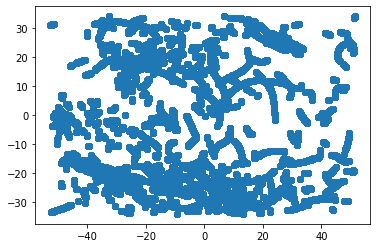

In [58]:
plt.scatter(pass_ev.df_model.loc[pass_ev.df_model['period']==2,'x_passer'], pass_ev.df_model.loc[pass_ev.df_model['period']==2,'y_passer'])

In [39]:
pass_ev.df_model.to_pickle('Passes_Manchester_vs_AVL.pkl')

In [41]:
pass_ev.df_model.columns

Index(['period', 'gameClock', 'team.name', 'x_passer', 'y_passer',
       'x_recipient', 'y_recipient', 'player.jersey_nb',
       'pass.recipient.jersey_nb', 'coord_all_team', 'coord_all_adversary',
       'completed', 'distance_sideline', 'distance_goal', 'distance_opponent',
       'speed_passer', 'opponents_closer_to_goal',
       'distance_receiver_sideline', 'distance_receiver_goal',
       'distance_receiver_opponent', 'opponents_closer_to_goal_receiver',
       'speed_receiver', 'bypassed_opponents', 'angle', 'opponents_in_path',
       'nearest_defender_pass_line', 'distance_pass'],
      dtype='object')